In [12]:
from langchain_ollama import ChatOllama
from langgraph.graph import StateGraph, END
from typing_extensions import TypedDict

llm = ChatOllama(model="qwen:7b")

In [13]:
# Define the StateGraph State, the return value after the graph invokation is a combination of both 
# `input` and `output`
# {"input": "LangGraph is pretty cool!", "output": "LangGraph, rad as punk!"}
class State(TypedDict):
    input: str
    output: str


def llm_echo_node(state: State):
    user_input = state.get("input", "")
    print(f"user_input, {user_input} \n")
    response = llm.invoke(f"Echo this back in a punk manner: '{user_input}'")
    return {"output": response.content}

In [14]:
builder = StateGraph(State)
# nodes do the work
builder.add_node("echo_llm", llm_echo_node) 

# start at "echo_llm" node
builder.set_entry_point("echo_llm")

# edges define the flow/route.
# the graph will start at "echo_llm" node and end at the END node.
builder.add_edge("echo_llm", END)

graph = builder.compile()

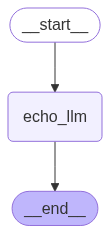

In [17]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
if __name__ == "__main__":
    input_state = {"input": "LangGraph is pretty cool!"}
    results = graph.invoke(input_state)
    output = results.get("output")

    print(f"output: {output}")

user_input, LangGraph is pretty cool! 

output: "LangGraph's kick-ass, dude!Pretty damn cool if you ask me!"
